In [1]:
!pip install kaggle

In [3]:
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi

In [4]:
import os

In [5]:
os.environ['KAGGLE_USERNAME'] = 'liudmilashegal'
os.environ['KAGGLE_KEY'] = '/kaggle.json'

In [6]:
api = KaggleApi()
api.authenticate()

In [7]:
import kaggle

In [8]:
kaggle.api.dataset_download_files('harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/content/imdb_top_1000.csv')

In [11]:
df.shape

(1000, 16)

In [12]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [14]:
df_cleaned= df.copy()

In [15]:
df_cleaned['Runtime'] = df_cleaned['Runtime'].str.extract('(\d+)').astype(int)

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


In [19]:
df_cleaned.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,1000.000000,843.000000,1.000000e+03
mean,122.891000,7.949300,77.971530,2.736929e+05
std,28.093671,0.275491,12.376099,3.273727e+05
min,45.000000,7.600000,28.000000,2.508800e+04
25%,103.000000,7.700000,70.000000,5.552625e+04
50%,119.000000,7.900000,79.000000,1.385485e+05
75%,137.000000,8.100000,87.000000,3.741612e+05
max,321.000000,9.300000,100.000000,2.343110e+06


In [25]:
df_cleaned.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [26]:
df_cleaned = df_cleaned.dropna(subset=['Released_Year'])

In [28]:
df_cleaned['Released_Year'] = df_cleaned['Released_Year'].str.extract('(\d+)') # Extract numbers from the 'Released_Year' column of 'df_cleaned'
df_cleaned['Released_Year'] = df_cleaned['Released_Year'].astype(int) # Convert the extracted numbers to integers

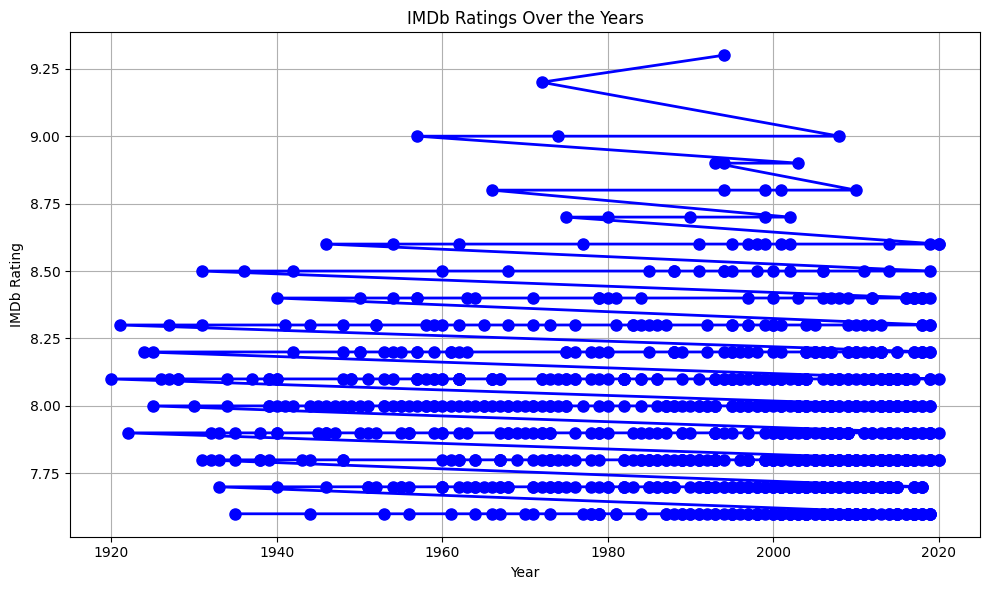

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Released_Year'], df_cleaned['IMDB_Rating'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

plt.title('IMDb Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')

plt.grid(True)

plt.tight_layout()
plt.show()

In [34]:
from collections import Counter

In [35]:
genre_counts = Counter()
for genres in df_cleaned['Genre']:
    genre_counts.update(genres.split(', '))

In [36]:
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index').reset_index()
genre_df.columns = ['Genre', 'Count']

<ipython-input-37-9c5526cf2e2a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=genre_df, palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Crime'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Biography'),
  Text(5, 0, 'History'),
  Text(6, 0, 'Sci-Fi'),
  Text(7, 0, 'Romance'),
  Text(8, 0, 'Western'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Comedy'),
  Text(11, 0, 'Thriller'),
  Text(12, 0, 'Animation'),
  Text(13, 0, 'Family'),
  Text(14, 0, 'War'),
  Text(15, 0, 'Mystery'),
  Text(16, 0, 'Music'),
  Text(17, 0, 'Horror'),
  Text(18, 0, 'Musical'),
  Text(19, 0, 'Film-Noir'),
  Text(20, 0, 'Sport')])

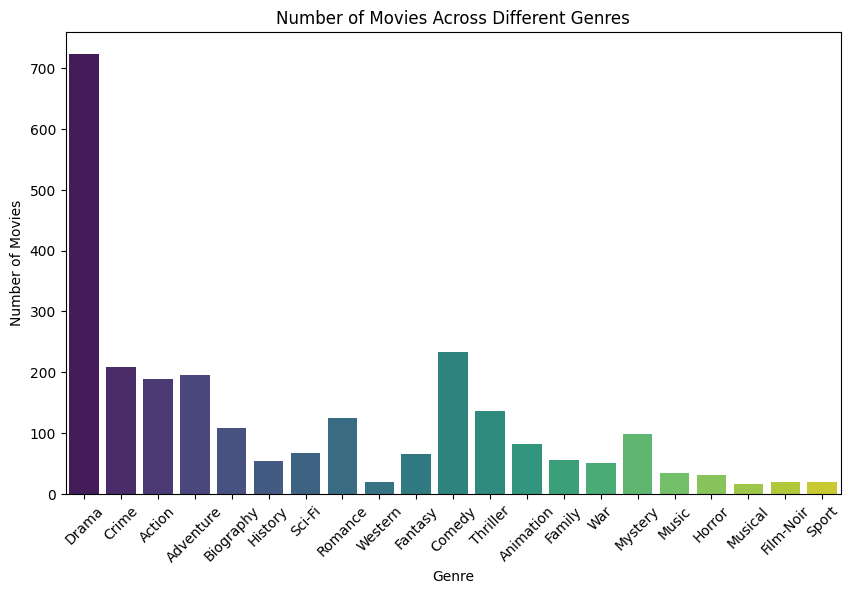

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Count', data=genre_df, palette='viridis')

plt.title('Number of Movies Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

plt.xticks(rotation=45)

In [38]:
director_ratings = df_cleaned.groupby('Director')['IMDB_Rating'].mean().reset_index()

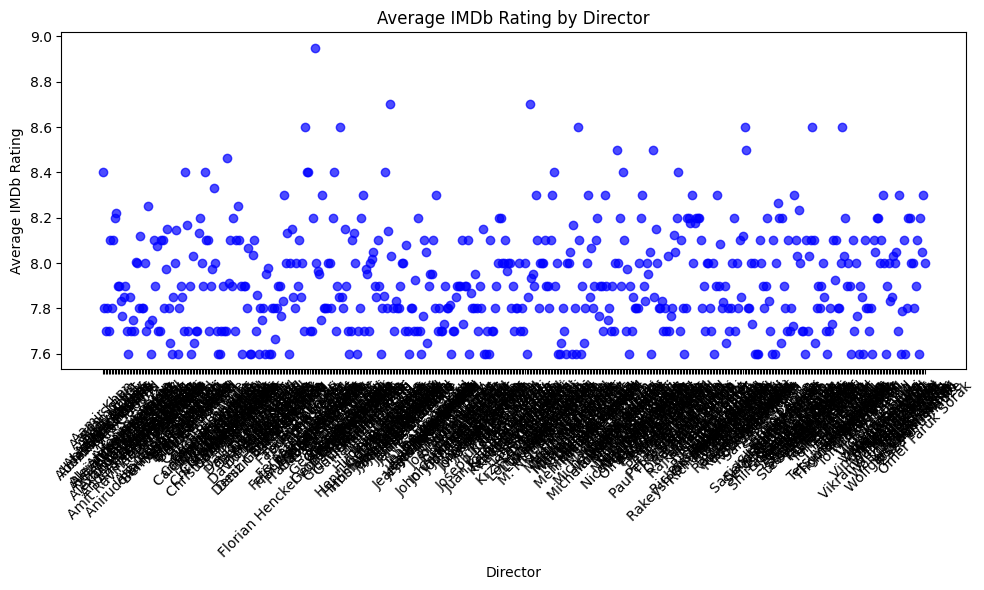

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(director_ratings['Director'], director_ratings['IMDB_Rating'], color='blue', alpha=0.7)

plt.title('Average IMDb Rating by Director')
plt.xlabel('Director')
plt.ylabel('Average IMDb Rating')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [42]:
df_for_stars=df.copy()

In [79]:
columns_to_clean = ['Released_Year', 'Gross', 'Meta_score']
df_for_stars = df_for_stars.dropna(subset=columns_to_clean)

In [49]:
df_for_stars['Gross'] = df_for_stars['Gross'].str.replace(',', '').astype(int)

In [47]:
df_for_stars.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [50]:
columns_to_plot = ['Star1', 'Star2', 'Star3', 'Star4', 'IMDB_Rating', 'Gross']
df_subset = df_for_stars[columns_to_plot]

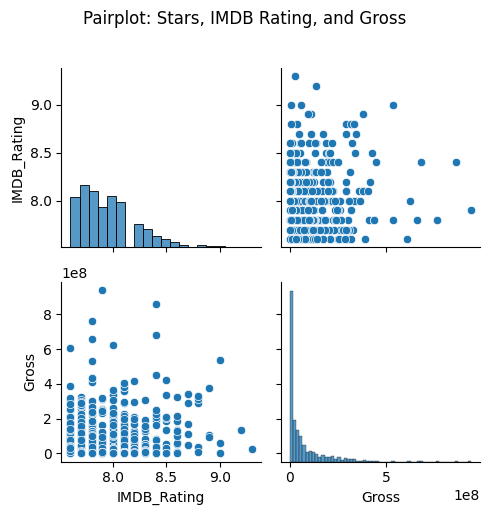

In [51]:
sns.pairplot(df_subset)

plt.suptitle('Pairplot: Stars, IMDB Rating, and Gross', y=1.02)

plt.tight_layout()
plt.show()

In [73]:
df_genres = df.copy()

In [75]:
df_genres['First_Genre'] = df_genres['Genre'].str.split(',').str[0]

<ipython-input-76-a0db81d859a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='First_Genre', y='IMDB_Rating', data=df_genres, palette='Set2')


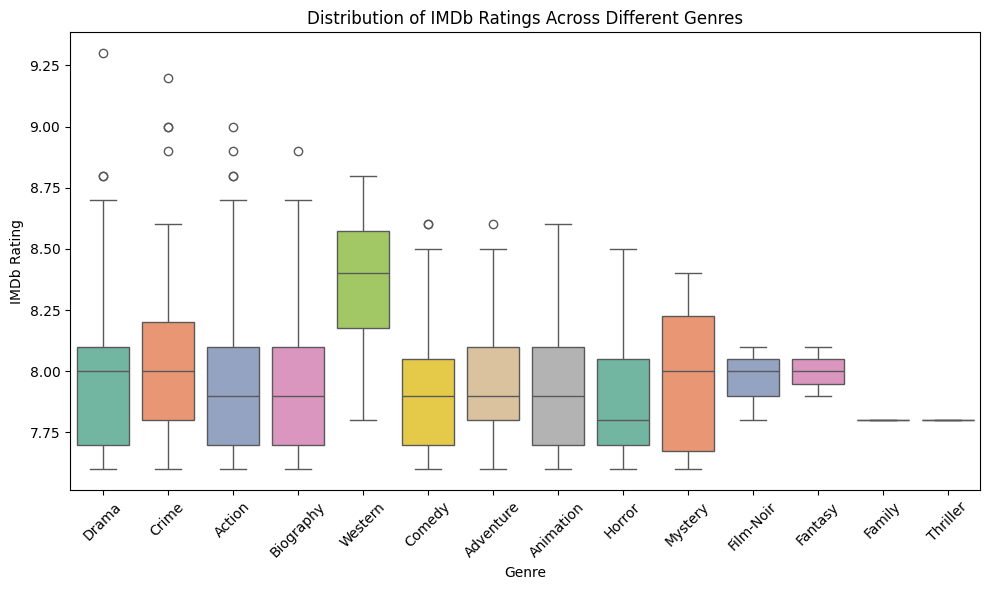

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='First_Genre', y='IMDB_Rating', data=df_genres, palette='Set2')

# Add labels and title
plt.title('Distribution of IMDb Ratings Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [80]:
df_for_stars.isnull().sum()

Poster_Link       0
Series_Title      0
Released_Year     0
Certificate      36
Runtime           0
Genre             0
IMDB_Rating       0
Overview          0
Meta_score        0
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
dtype: int64

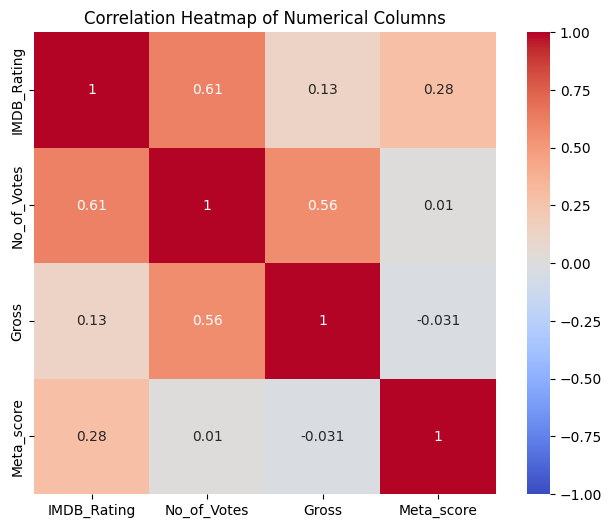

In [82]:
correlation_matrix = df_for_stars[['IMDB_Rating', 'No_of_Votes', 'Gross', 'Meta_score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Numerical Columns')
plt.show()